<a href="https://www.kaggle.com/code/shiv1219/rfm-segmentation-clv?scriptVersionId=167279574" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://www.kaggle.com/code/shiv1219/rfm-segmentation-clv?scriptVersionId=161961334" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/major-project/Online Retail.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [3]:
raw_df = pd.read_excel("/kaggle/input/major-project/Online Retail.xlsx")

In [4]:
transaction_df = raw_df.copy()

# Exploratory Data Analysis

In [5]:
transaction_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
transaction_df = transaction_df[["CustomerID", "InvoiceNo", "StockCode", "Description", "Quantity", "UnitPrice", "InvoiceDate", "Country"]]

In [7]:
transaction_df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country
0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,WHITE METAL LANTERN,6,3.39,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,2010-12-01 08:26:00,United Kingdom


In [8]:
transaction_df.shape

(541909, 8)

In [9]:
#Checking the non null value count and datatype
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   406829 non-null  float64       
 1   InvoiceNo    541909 non-null  object        
 2   StockCode    541909 non-null  object        
 3   Description  540455 non-null  object        
 4   Quantity     541909 non-null  int64         
 5   UnitPrice    541909 non-null  float64       
 6   InvoiceDate  541909 non-null  datetime64[ns]
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
transaction_df["Country"].nunique()

38

In [11]:
transaction_df["Country"].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


We have total 37 countries and also have 446 records where country is unspecified.

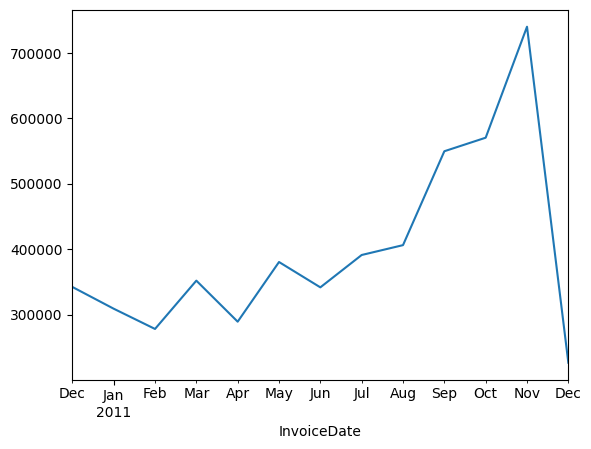

In [12]:
transaction_df.groupby(pd.Grouper(key="InvoiceDate", freq="M"))["Quantity"].sum().plot()
plt.show()

In [13]:
transaction_df[transaction_df["InvoiceDate"]>= "2011-12-01"]["InvoiceDate"].describe()[["min","max"]]

min    2011-12-01 08:12:00
max    2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In Dec2011 we have data till 9th Dec only. so we need to have remove records from Dec.

In [14]:
transaction_df = transaction_df[transaction_df["InvoiceDate"]< "2011-12-01"]

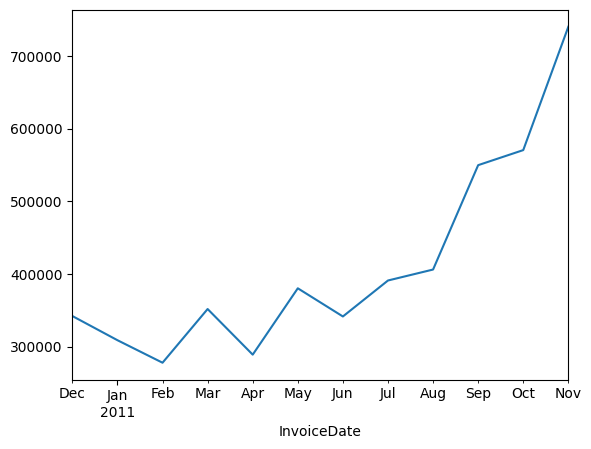

In [15]:
transaction_df.groupby(pd.Grouper(key="InvoiceDate", freq="M"))["Quantity"].sum().plot()
plt.show()

**Handling null values**

In [16]:
#checking null value count for each column 
transaction_df.isna().sum()

CustomerID     127216
InvoiceNo           0
StockCode           0
Description      1439
Quantity            0
UnitPrice           0
InvoiceDate         0
Country             0
dtype: int64

In [17]:
#null values in each column by percentage
round(100*(transaction_df.isna().sum()/len(transaction_df)),2)

CustomerID     24.64
InvoiceNo       0.00
StockCode       0.00
Description     0.28
Quantity        0.00
UnitPrice       0.00
InvoiceDate     0.00
Country         0.00
dtype: float64

In [18]:
invoice_cust_dict = transaction_df.groupby("InvoiceNo")["CustomerID"].first().to_dict()
transaction_df["CustomerID"] = transaction_df["InvoiceNo"].map(invoice_cust_dict)

In [19]:
transaction_df["CustomerID"].isna().sum(), transaction_df["CustomerID"].notnull().sum()

(127216, 389168)

In [20]:
transaction_df["CustomerID"].isna().sum()/transaction_df["CustomerID"].size

0.24635929850653776

In [21]:
#Droping Null Values
transaction_df =transaction_df.dropna(subset = ["CustomerID", "Description"])

In [22]:
#checking null value count for each column 
transaction_df.isna().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
InvoiceDate    0
Country        0
dtype: int64

Null values are dropped

In [23]:
#Changing datatype from float to object
transaction_df["CustomerID"] = transaction_df["CustomerID"].astype("Int64").astype("object")

**Removing Outlier**

In [24]:
transaction_df.describe()

,Quantity,UnitPrice,InvoiceDate
count,389168.000000,389168.000000,389168
mean,12.084889,3.488779,2011-07-03 23:25:50.435750400
min,-74215.000000,0.000000,2010-12-01 08:26:00
25%,2.000000,1.250000,2011-04-01 11:34:00
50%,5.000000,1.950000,2011-07-20 14:06:00
75%,12.000000,3.750000,2011-10-12 12:47:00
max,74215.000000,38970.000000,2011-11-30 17:42:00
std,175.692602,70.796324,NaN


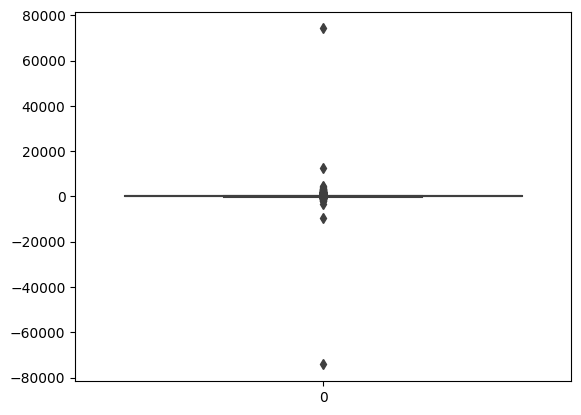

In [25]:
sns.boxplot(transaction_df["Quantity"])
plt.show()

In [26]:
def remove_outliers(dfd, column_name, iqr_multiplier=2):
    q1 = dfd[column_name].quantile(0.25)
    q3 = dfd[column_name].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - (iqr_multiplier * iqr)
    upper_bound = q3 + (iqr_multiplier * iqr)
    dfd = dfd[(dfd[column_name]>=lower_bound) & (dfd[column_name]<=upper_bound)]
    return dfd

In [27]:
transaction_df = remove_outliers(transaction_df,"Quantity")

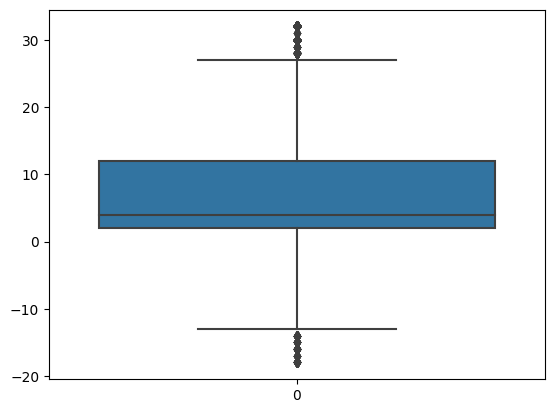

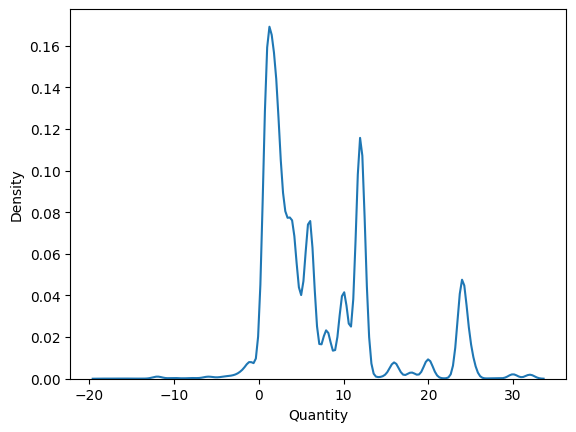

In [28]:
sns.boxplot(transaction_df["Quantity"])
plt.show()

sns.kdeplot(transaction_df["Quantity"])
plt.show()

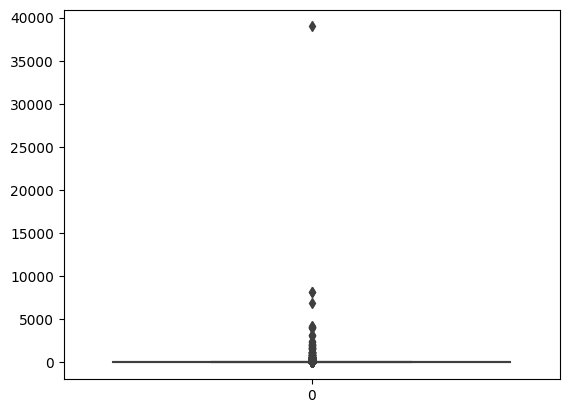

In [29]:
sns.boxplot(transaction_df["UnitPrice"])
plt.show()

In [30]:
transaction_df = remove_outliers(transaction_df, "UnitPrice")

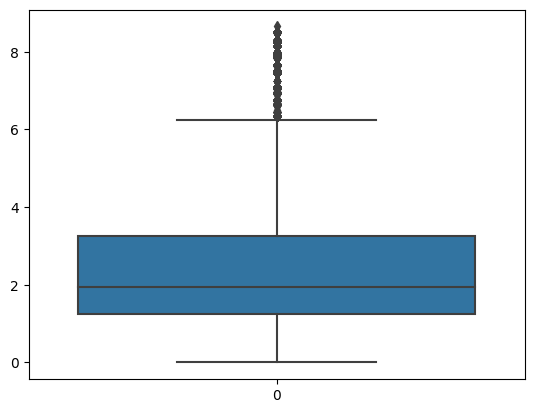

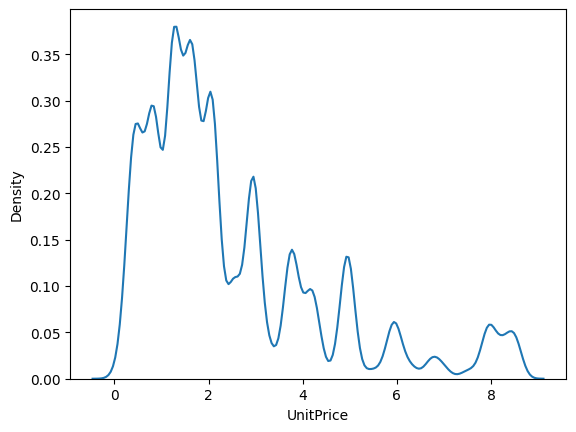

In [31]:
sns.boxplot(transaction_df["UnitPrice"])
plt.show()

sns.kdeplot(transaction_df["UnitPrice"])
plt.show()

In [32]:
transaction_df = transaction_df[transaction_df["UnitPrice"]>0]

In [33]:
transaction_df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,InvoiceDate,Country
0,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,2010-12-01 08:26:00,United Kingdom
1,17850,536365,71053,WHITE METAL LANTERN,6,3.39,2010-12-01 08:26:00,United Kingdom
2,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,2010-12-01 08:26:00,United Kingdom
3,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,2010-12-01 08:26:00,United Kingdom
4,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,2010-12-01 08:26:00,United Kingdom


In [34]:
#Total Amount Added
TotalAmount = transaction_df["Quantity"] * transaction_df["UnitPrice"]
transaction_df.insert(loc=6, column="TotalAmount", value=round(TotalAmount,2))
transaction_df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalAmount,InvoiceDate,Country
0,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom


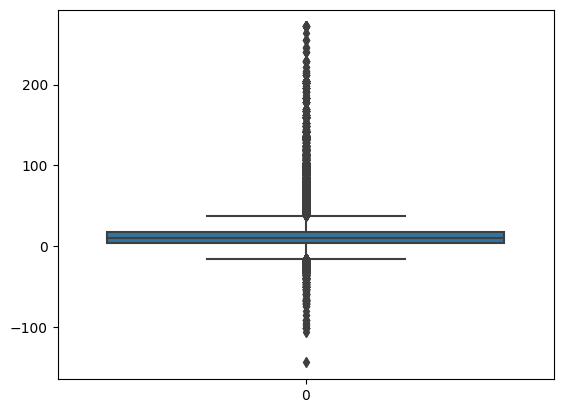

In [35]:
sns.boxplot(transaction_df["TotalAmount"])
plt.show()

In [36]:
 transaction_df.describe()

,Quantity,UnitPrice,TotalAmount,InvoiceDate
count,348152.000000,348152.000000,348152.000000,348152
mean,7.196276,2.496948,13.104028,2011-07-04 18:59:57.965716480
min,-18.000000,0.001000,-144.330000,2010-12-01 08:26:00
25%,2.000000,1.250000,3.900000,2011-04-01 14:45:00
50%,5.000000,1.950000,10.200000,2011-07-21 17:09:00
75%,12.000000,3.250000,17.340000,2011-10-13 12:30:00
max,32.000000,8.650000,272.000000,2011-11-30 17:42:00
std,7.050934,1.984818,14.954541,NaN


In [37]:
display(transaction_df['StockCode'].value_counts(normalize=True).head())
display(transaction_df['InvoiceNo'].value_counts(normalize=True).head())
display(transaction_df['CustomerID'].value_counts(normalize=True).head())
display(transaction_df['Country'].value_counts(normalize=True).head())

StockCode
85123A    0.005480
85099B    0.003947
47566     0.003654
20725     0.003567
84879     0.003510
Name: proportion, dtype: float64

InvoiceNo
576339    0.001402
579196    0.001347
573576    0.001146
567656    0.001114
578270    0.001109
Name: proportion, dtype: float64

CustomerID
17841    0.020781
14911    0.013557
14096    0.011909
12748    0.011708
14606    0.007281
Name: proportion, dtype: float64

Country
United Kingdom    0.899412
Germany           0.022887
France            0.020319
EIRE              0.016602
Spain             0.006092
Name: proportion, dtype: float64

**Plotting Graphs on the basis of Purchase**

<Axes: xlabel='Country', ylabel='Purchase'>

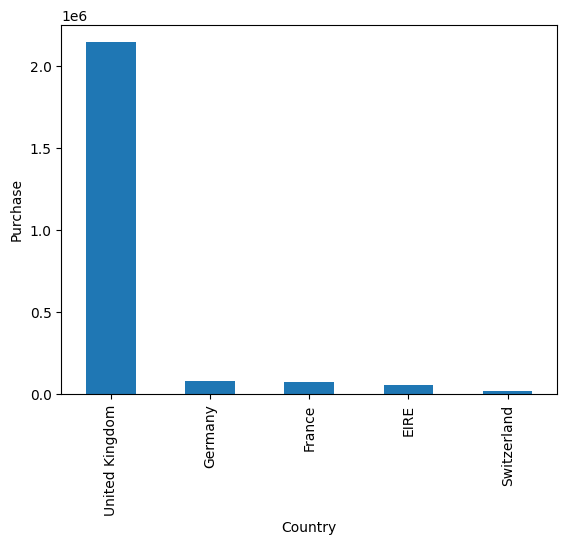

In [38]:
#Top 5 countries as per Purchase
country_quant = transaction_df.groupby("Country")["Quantity"].sum().sort_values(ascending=False)
country_quant.iloc[:5].plot(kind = "bar", ylabel="Purchase")

<Axes: xlabel='Country', ylabel='Purchase'>

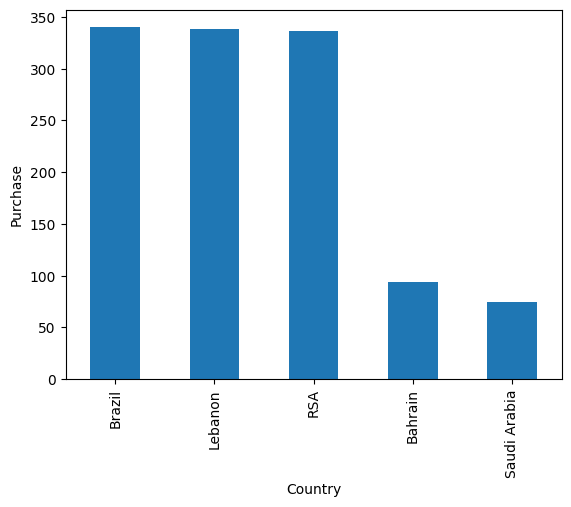

In [39]:
#Lowest 5 countries as per Purchase
country_quant.iloc[len(country_quant)-5:len(country_quant)].plot(kind = "bar", ylabel="Purchase")

**Plotting Graphs on the basis of Revenue**

<Axes: xlabel='Country', ylabel='Revenue'>

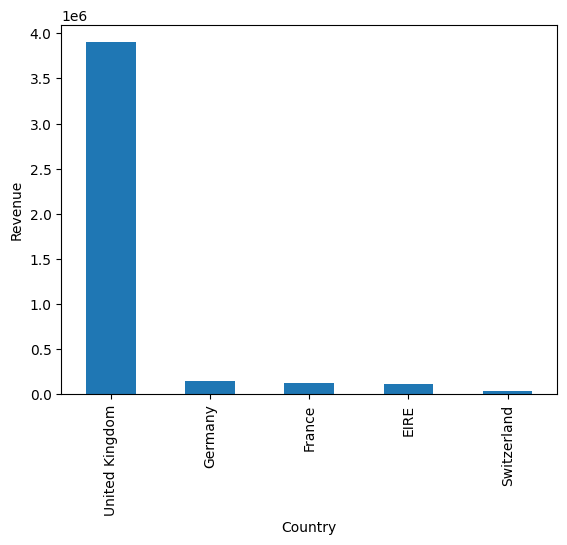

In [40]:
#Top 5 countries by revenue
country_revenue = transaction_df.groupby("Country")["TotalAmount"].sum().sort_values(ascending=False)
country_revenue.iloc[:5].plot(kind="bar", ylabel="Revenue")

<Axes: xlabel='Country', ylabel='Revenue'>

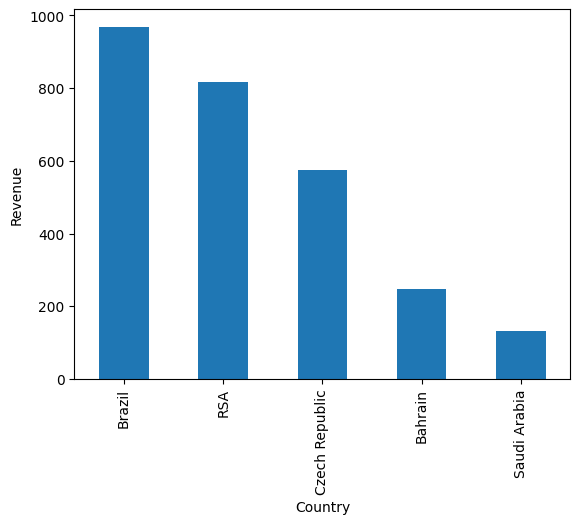

In [41]:
#Least 5 Countries by revenue
country_revenue.iloc[len(country_revenue)-5:].plot(kind="bar", ylabel="Revenue")

Quantity and Total Amount by Description.

In [42]:
transaction_df.groupby(["StockCode", "Description"])[["Quantity","TotalAmount"]].sum().sort_values(by="Quantity", ascending=False)

,,Quantity,TotalAmount
StockCode,Description,,
85123A,WHITE HANGING HEART T-LIGHT HOLDER,17901,49808.07
84879,ASSORTED COLOUR BIRD ORNAMENT,15956,26965.64
21212,PACK OF 72 RETROSPOT CAKE CASES,14693,8111.89
85099B,JUMBO BAG RED RETROSPOT,13193,26986.14
20725,LUNCH BAG RED RETROSPOT,10344,17104.00
...,...,...,...
35400,WOODEN BOX ADVENT CALENDAR,-8,-63.60
22034,ROBIN CHRISTMAS CARD,-9,-3.78
21144,PINK POODLE HANGING DECORATION,-12,-4.56


# CLV

In [43]:
# CLV = Avg Monthly Revenue Per Customer * Profit Margin(1) * Avg Lifespan

In [44]:
customer_wise_df = transaction_df.groupby(['CustomerID',pd.Grouper(key='InvoiceDate', freq='M')])['TotalAmount'].sum().to_frame().reset_index()
customer_wise_df.head()

,CustomerID,InvoiceDate,TotalAmount
0,12347,2010-12-31,688.39
1,12347,2011-01-31,437.14
2,12347,2011-04-30,325.00
3,12347,2011-06-30,351.82
4,12347,2011-08-31,440.46


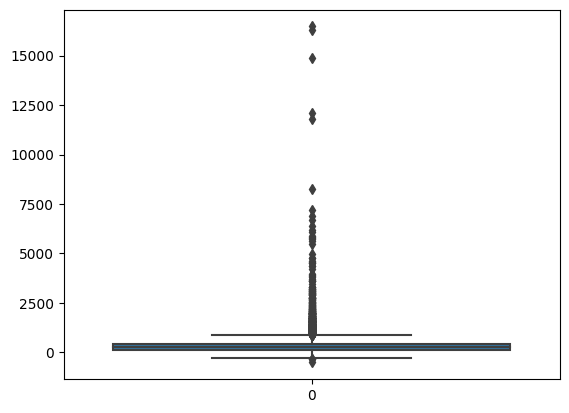

In [45]:
sns.boxplot(customer_wise_df['TotalAmount'])
plt.show()

In [46]:
customer_wise_df = remove_outliers(customer_wise_df, 'TotalAmount')

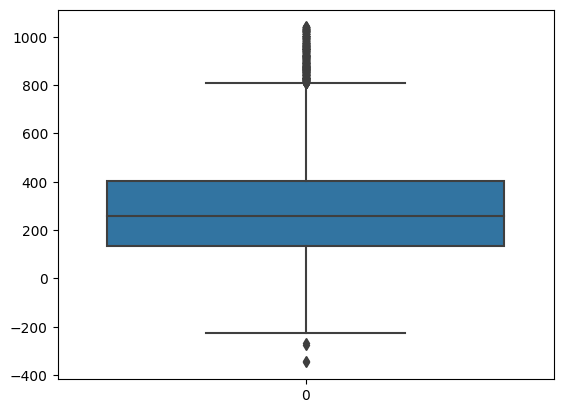

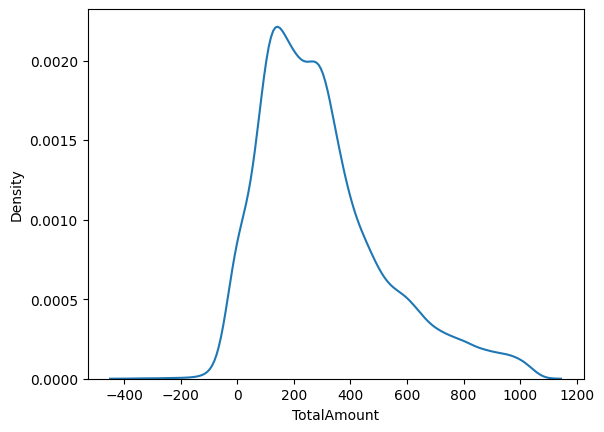

In [47]:
sns.boxplot(customer_wise_df['TotalAmount'])
plt.show()

sns.kdeplot(customer_wise_df['TotalAmount'])
plt.show()

In [48]:
# Avg Monthly Revenue Per Customer 
customer_wise_df.head()
avg_revenue = customer_wise_df['TotalAmount'].mean()
avg_revenue

297.81658325557726

In [49]:
# Lifespan = Last Purchase Date - First Purchase Date
customer_wise_df = transaction_df.groupby('CustomerID').agg(
    first_purchase_date = ('InvoiceDate', 'min'),
    last_purchase_date = ('InvoiceDate', 'max')
).reset_index()
customer_wise_df['LifeSpan'] = customer_wise_df['last_purchase_date'] - customer_wise_df['first_purchase_date']
customer_wise_df['LifeSpan'] = customer_wise_df['LifeSpan'].dt.days/30

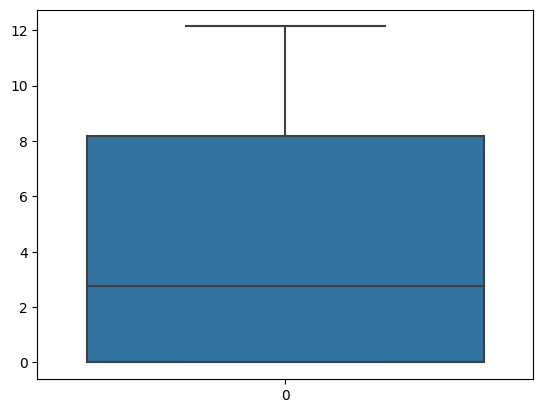

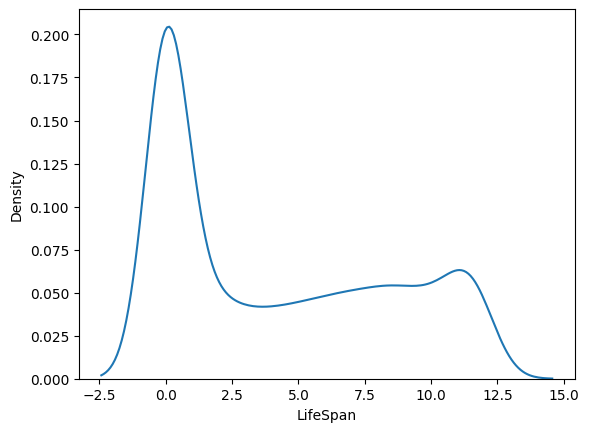

In [50]:
sns.boxplot(customer_wise_df['LifeSpan'])
plt.show()

sns.kdeplot(customer_wise_df['LifeSpan'])
plt.show()

In [51]:
avg_lifespan = customer_wise_df['LifeSpan'].mean()
avg_lifespan

4.188619240225235

In [52]:
print(f"CLV = $ {avg_revenue* 1 * avg_lifespan:.0f} ")

CLV = $ 1247 


In [53]:
# Traditional CLV = Avg Revenue * Retention Rate / Churn Rate

In [54]:
avg_revenue

297.81658325557726

In [55]:
months = list(transaction_df.groupby(pd.Grouper(key='InvoiceDate', freq='M')).groups.keys())
monthly_rentention_matrx_df = pd.DataFrame()

for i in range(len(months)):
    cur_m = months[i]
    mask = (transaction_df['InvoiceDate'].dt.month == cur_m.month) & \
            (transaction_df['InvoiceDate'].dt.year == cur_m.year) 
    active_customers = transaction_df[mask]['CustomerID'].unique()
    
    k = 1
    for j in range(i, len(months)):
        next_m = months[j]
        mask = (transaction_df['InvoiceDate'].dt.month == next_m.month) & \
                (transaction_df['InvoiceDate'].dt.year == next_m.year) & \
                transaction_df['CustomerID'].isin(active_customers)
        retained_customers= transaction_df[mask]['CustomerID'].nunique()
        monthly_rentention_matrx_df.loc[str(cur_m.date()), k] = retained_customers
        k += 1
    
monthly_rentention_matrx_df

,1,2,3,4,5,6,7,8,9,10,11,12
2010-12-31,893.0,333.0,290.0,336.0,314.0,354.0,338.0,304.0,308.0,344.0,331.0,445.0
2011-01-31,738.0,270.0,326.0,283.0,335.0,321.0,293.0,290.0,323.0,319.0,381.0,NaN
2011-02-28,746.0,307.0,280.0,346.0,321.0,308.0,294.0,320.0,313.0,364.0,NaN,NaN
2011-03-31,970.0,305.0,427.0,404.0,364.0,346.0,403.0,381.0,467.0,NaN,NaN,NaN
2011-04-30,844.0,361.0,370.0,341.0,321.0,378.0,355.0,409.0,NaN,NaN,NaN,NaN
2011-05-31,1031.0,434.0,426.0,415.0,453.0,432.0,517.0,NaN,NaN,NaN,NaN,NaN
2011-06-30,1004.0,389.0,414.0,465.0,442.0,512.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-31,941.0,399.0,422.0,439.0,496.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-31,921.0,427.0,420.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-30,1240.0,526.0,670.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
cohort_size = monthly_rentention_matrx_df.loc[:, 1]
monthly_rentention_rate_matrx_df = monthly_rentention_matrx_df.divide(cohort_size, axis=0)
monthly_rentention_rate_matrx_df

,1,2,3,4,5,6,7,8,9,10,11,12
2010-12-31,1.0,0.372900,0.324748,0.376260,0.351624,0.396417,0.378499,0.340426,0.344905,0.385218,0.370661,0.49832
2011-01-31,1.0,0.365854,0.441734,0.383469,0.453930,0.434959,0.397019,0.392954,0.437669,0.432249,0.516260,NaN
2011-02-28,1.0,0.411528,0.375335,0.463807,0.430295,0.412869,0.394102,0.428954,0.419571,0.487936,NaN,NaN
2011-03-31,1.0,0.314433,0.440206,0.416495,0.375258,0.356701,0.415464,0.392784,0.481443,NaN,NaN,NaN
2011-04-30,1.0,0.427725,0.438389,0.404028,0.380332,0.447867,0.420616,0.484597,NaN,NaN,NaN,NaN
2011-05-31,1.0,0.420951,0.413191,0.402522,0.439379,0.419011,0.501455,NaN,NaN,NaN,NaN,NaN
2011-06-30,1.0,0.387450,0.412351,0.463147,0.440239,0.509960,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-31,1.0,0.424017,0.448459,0.466525,0.527099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-31,1.0,0.463626,0.456026,0.542888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-30,1.0,0.424194,0.540323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
retention_rate = monthly_rentention_rate_matrx_df.iloc[:, 1:].mean().mean()
retention_rate

0.43139797548347014

In [58]:
#churn = 1 - retention_rate
churn = 1 - retention_rate
churn 

0.5686020245165299

In [59]:
# Traditional CLV = Avg Revenue * Retention Rate / Churn Rate
avg_revenue * (retention_rate/churn)

225.9532424125679

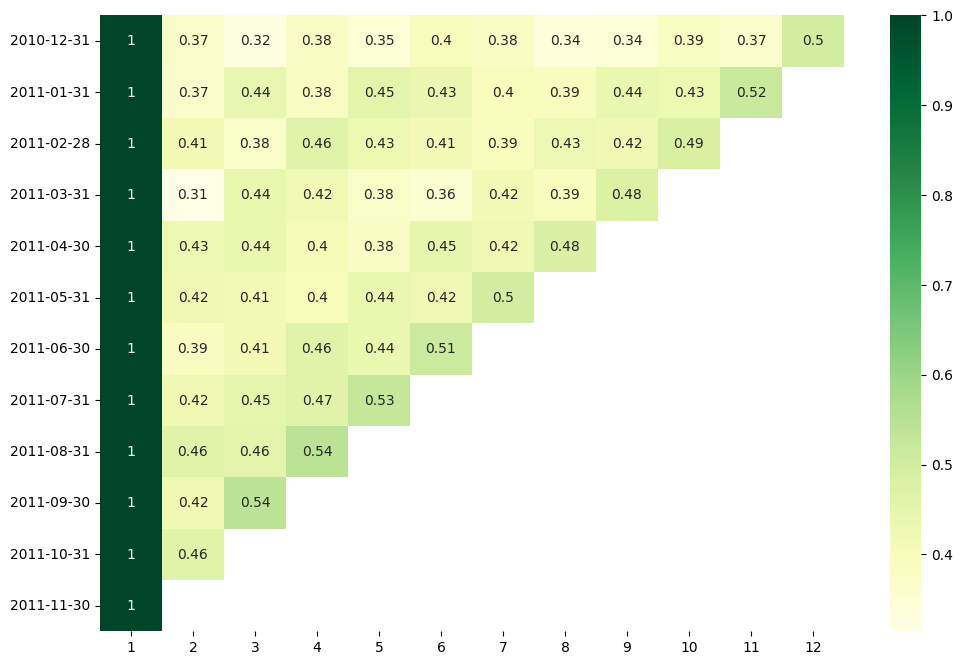

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_rentention_rate_matrx_df, annot=True, cmap='YlGn')
plt.show()

RFM Analysis


We are going to analysis the Customers based on below 3 factors:


R (Recency): Number of days since last purchase

F (Frequency): Number of tracsactions

M (Monetary): Total amount of transactions (revenue contributed)

In [61]:
transaction_df.head()

,CustomerID,InvoiceNo,StockCode,Description,Quantity,UnitPrice,TotalAmount,InvoiceDate,Country
0,17850,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,United Kingdom
1,17850,536365,71053,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom
2,17850,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,United Kingdom
3,17850,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom
4,17850,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,United Kingdom


In [62]:
NOW = transaction_df["InvoiceDate"].max()
rfm_df = transaction_df.groupby(['CustomerID', pd.Grouper(key='InvoiceDate', freq='M')]).agg(
    recency=('InvoiceDate', lambda x: (NOW - x.max()).days),
    frequency=('InvoiceNo', 'nunique'),
    monetary=('TotalAmount', 'sum')
).reset_index()

rfm_df

,CustomerID,InvoiceDate,recency,frequency,monetary
0,12347,2010-12-31,358,1,688.39
1,12347,2011-01-31,308,1,437.14
2,12347,2011-04-30,237,1,325.00
3,12347,2011-06-30,174,1,351.82
4,12347,2011-08-31,120,1,440.46
...,...,...,...,...,...
12355,18283,2011-09-30,86,1,134.90
12356,18283,2011-10-31,34,1,98.70
12357,18283,2011-11-30,0,4,651.56
12358,18287,2011-05-31,192,1,549.28


In [63]:
rfm_df[rfm_df['CustomerID'] == 12348]

,CustomerID,InvoiceDate,recency,frequency,monetary
6,12348,2010-12-31,348,1,52.8
7,12348,2011-01-31,309,1,20.4
8,12348,2011-04-30,239,1,17.0


In [64]:
rfm_df = rfm_df.groupby('CustomerID').agg(
    recency=('recency', lambda x: x.min()/30),
    frequency=('frequency', 'mean'),
    monetary=('monetary', 'mean')
)
rfm_df

,recency,frequency,monetary
CustomerID,,,
12347,1.000000,1.000000,537.535000
12348,7.966667,1.000000,30.066667
12349,0.300000,1.000000,1197.150000
12350,10.033333,1.000000,294.400000
12352,0.900000,2.000000,278.027500
...,...,...,...
18280,8.933333,1.000000,160.700000
18281,5.700000,1.000000,46.920000
18282,3.766667,2.000000,59.340000


In [65]:
rfm_df_org = rfm_df.copy()

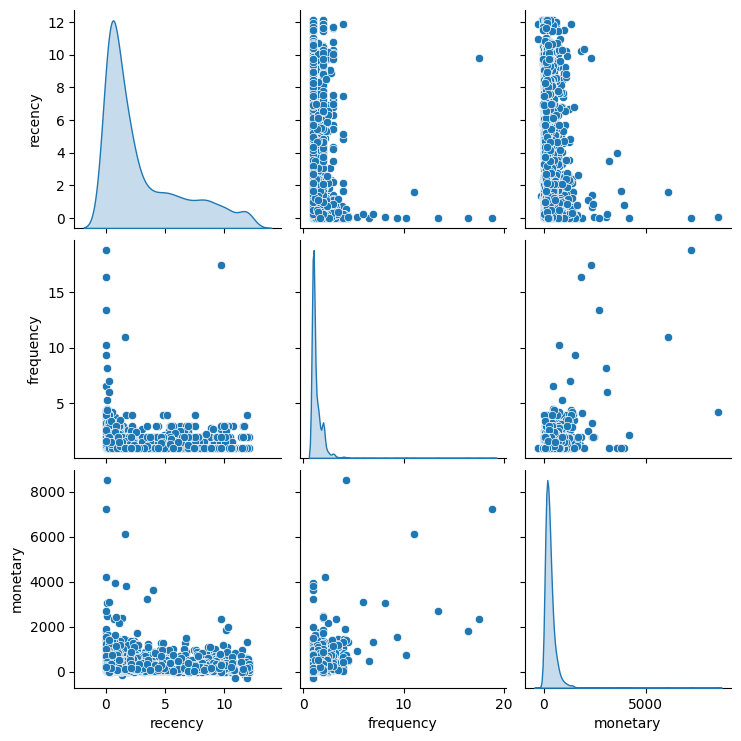

In [66]:
sns.pairplot(rfm_df, diag_kind='kde')
plt.show()

In [67]:
rfm_df = remove_outliers(rfm_df, 'frequency')
rfm_df = remove_outliers(rfm_df, 'monetary')

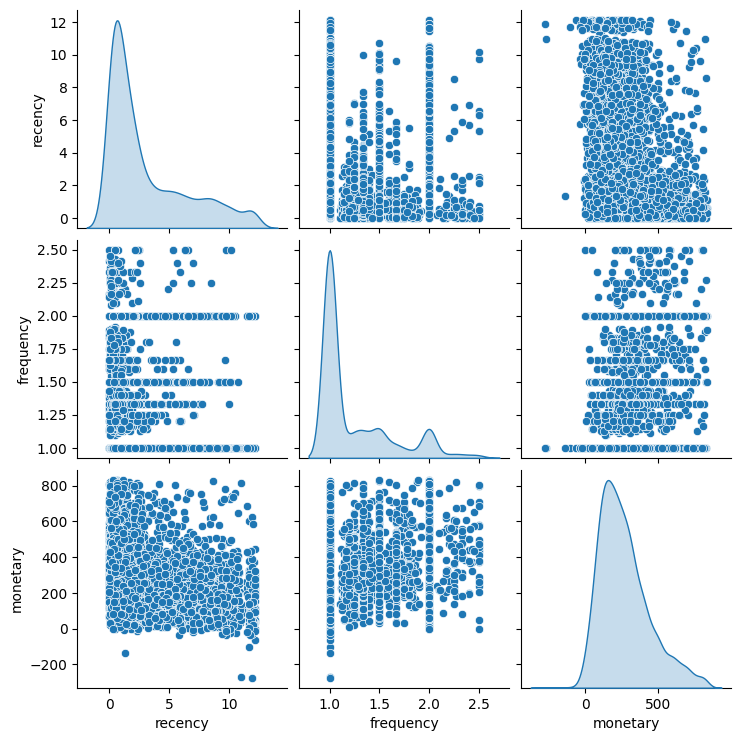

In [68]:
sns.pairplot(rfm_df, diag_kind='kde')
plt.show()

In [69]:
#scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)
rfm_scaled_df = pd.DataFrame(rfm_scaled, index=rfm_df.index, columns=rfm_df.columns)
rfm_scaled_df

,recency,frequency,monetary
CustomerID,,,
12347,-0.622968,-0.641959,1.588249
12348,1.475999,-0.641959,-1.391199
12350,2.098659,-0.641959,0.160755
12352,-0.653097,2.066326,0.064628
12353,1.024068,-0.641959,-1.395701
...,...,...,...
18280,1.767243,-0.641959,-0.624225
18281,0.793082,-0.641959,-1.292250
18282,0.210593,2.066326,-1.219330


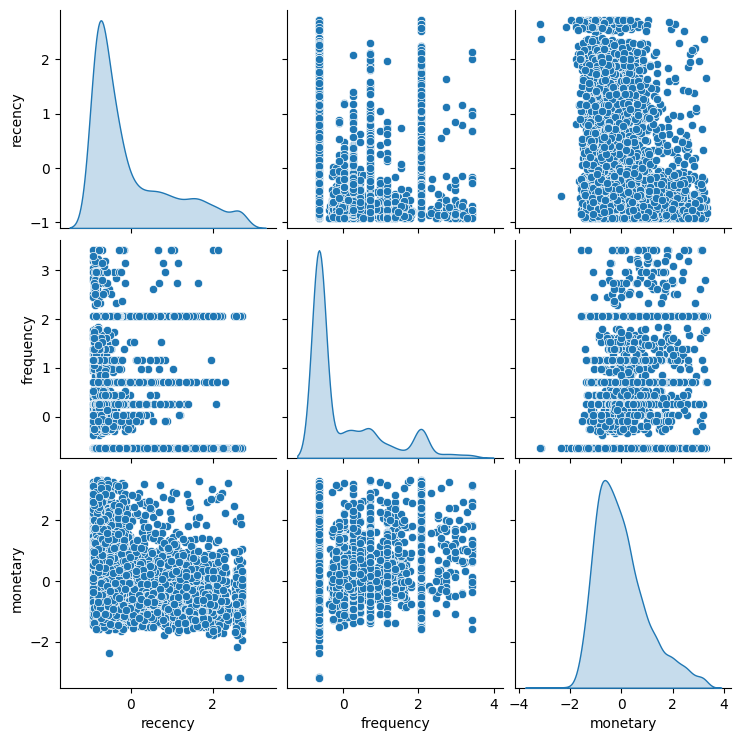

In [70]:
sns.pairplot(rfm_scaled_df, diag_kind='kde')
plt.show()

In [71]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(k, random_state=4, n_init=10)
    kmeans.fit(rfm_scaled_df)
    sse[k] = kmeans.inertia_

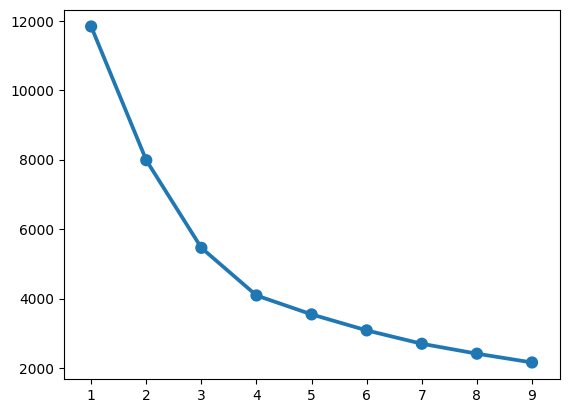

In [72]:
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [73]:
kmeans = KMeans(4, random_state=4, n_init=10)
rfm_df['segment'] = kmeans.fit_predict(rfm_scaled_df)
rfm_df

,recency,frequency,monetary,segment
CustomerID,,,,
12347,1.000000,1.000000,537.535000,1
12348,7.966667,1.000000,30.066667,2
12350,10.033333,1.000000,294.400000,2
12352,0.900000,2.000000,278.027500,3
12353,6.466667,1.000000,29.300000,2
...,...,...,...,...
18280,8.933333,1.000000,160.700000,2
18281,5.700000,1.000000,46.920000,2
18282,3.766667,2.000000,59.340000,3


In [74]:
rfm_df['segment'].value_counts()

segment
0    1817
2     826
3     675
1     627
Name: count, dtype: int64

In [75]:
rfm_df.groupby('segment').mean()

,recency,frequency,monetary
segment,,,
0,1.509374,1.090259,191.814294
1,1.888198,1.167303,518.882768
2,8.390032,1.049274,169.835732
3,1.845086,1.926673,354.433721


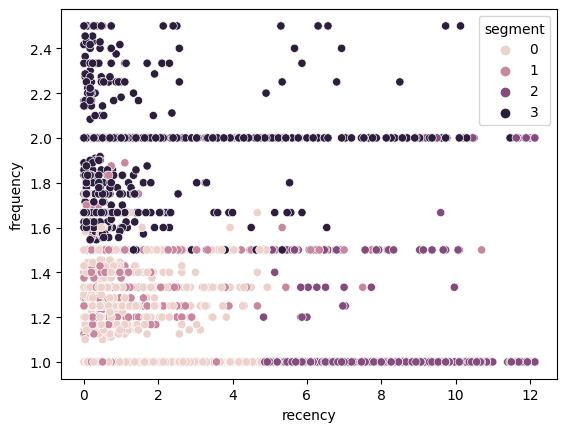

In [76]:
sns.scatterplot(data=rfm_df, x='recency', y='frequency', hue='segment')
plt.show()

In [77]:
customerid_with_segment_df = transaction_df[['CustomerID','InvoiceDate','TotalAmount']]
customerid_with_segment_df = customerid_with_segment_df.merge(rfm_df, on='CustomerID', how='inner')
customerid_with_segment_df = customerid_with_segment_df.drop(['recency','frequency','monetary'], axis = 1)
customerid_with_segment_df

,CustomerID,InvoiceDate,TotalAmount,segment
0,13047,2010-12-01 08:34:00,54.08,3
1,13047,2010-12-01 08:34:00,12.60,3
2,13047,2010-12-01 08:34:00,12.60,3
3,13047,2010-12-01 08:34:00,30.00,3
4,13047,2010-12-01 08:34:00,9.90,3
...,...,...,...,...
267622,15444,2011-11-30 17:37:00,7.95,1
267623,15444,2011-11-30 17:37:00,5.95,1
267624,16717,2011-11-30 17:42:00,-1.25,1
267625,16717,2011-11-30 17:42:00,-7.95,1


In [78]:
avg_revenue
def calculate_clv(dfd):
    months = list(dfd.groupby(pd.Grouper(key='InvoiceDate', freq='M')).groups.keys())
    segment_monthly_rentention_matrix_df = pd.DataFrame()

    for i in range(len(months)):
        cur_m = months[i]
        mask = (dfd['InvoiceDate'].dt.month == cur_m.month) & \
                (dfd['InvoiceDate'].dt.year == cur_m.year) 
        active_customers = dfd[mask]['CustomerID'].unique()

        k = 1
        for j in range(i, len(months)):
            next_m = months[j]
            mask = (dfd['InvoiceDate'].dt.month == next_m.month) & \
                    (dfd['InvoiceDate'].dt.year == next_m.year) & \
                    dfd['CustomerID'].isin(active_customers)
            retained_customers= dfd[mask]['CustomerID'].nunique()
            segment_monthly_rentention_matrix_df.loc[str(cur_m.date()), k] = retained_customers
            k += 1
    
    #Calculating rate
    cohort_size = segment_monthly_rentention_matrix_df.loc[:, 1]
    segment_monthly_rentention_rate_matrix_df = segment_monthly_rentention_matrix_df.divide(cohort_size, axis=0)
    segment_monthly_rentention_rate_matrix_df
    
    #calculating retention rate
    retention_rate = segment_monthly_rentention_rate_matrix_df.iloc[:, 1:].mean().mean()
    
    #calculating average revenue
    avg_revenue =  dfd.groupby(['CustomerID',pd.Grouper(key='InvoiceDate', freq='M')])['TotalAmount'].sum().mean()
    
    #calculating clv    
    churn_rate = 1 - retention_rate
   
    return avg_revenue*(retention_rate/churn_rate)
    

In [79]:
segment_wise_clv = []
for i in range(rfm_df['segment'].nunique()):
    clv = calculate_clv(customerid_with_segment_df[customerid_with_segment_df['segment'] == i])
    segment_wise_clv.append((i,clv))

In [80]:
segment_wise_clv

[(0, 145.27791223361461),
 (1, 429.58269794489996),
 (2, 13.984729768428023),
 (3, 610.7105099579762)]

Pickling

In [81]:
#Pickling kmeans model
pickle.dump(kmeans, open('kmeans_segmentation_model.pkl', 'wb'))

Exporting report in excel

In [82]:
rfm_df.reset_index(inplace = True)
#rfm_df.drop(columns = ['index'], inplace = True)
rfm_df

,CustomerID,recency,frequency,monetary,segment
0,12347,1.000000,1.000000,537.535000,1
1,12348,7.966667,1.000000,30.066667,2
2,12350,10.033333,1.000000,294.400000,2
3,12352,0.900000,2.000000,278.027500,3
4,12353,6.466667,1.000000,29.300000,2
...,...,...,...,...,...
3940,18280,8.933333,1.000000,160.700000,2
3941,18281,5.700000,1.000000,46.920000,2
3942,18282,3.766667,2.000000,59.340000,3
3943,18283,0.000000,1.666667,206.775556,3


In [83]:
segment_wise_clv = pd.DataFrame(segment_wise_clv, columns = ['segment','clv'])
segment_wise_clv

,segment,clv
0,0,145.277912
1,1,429.582698
2,2,13.984730
3,3,610.710510


In [84]:
customer_segment_clv = rfm_df.merge(segment_wise_clv, on = 'segment')
customer_segment_clv

,CustomerID,recency,frequency,monetary,segment,clv
0,12347,1.000000,1.000000,537.535000,1,429.582698
1,12348,7.966667,1.000000,30.066667,2,13.984730
2,12350,10.033333,1.000000,294.400000,2,13.984730
3,12352,0.900000,2.000000,278.027500,3,610.710510
4,12353,6.466667,1.000000,29.300000,2,13.984730
...,...,...,...,...,...,...
3940,18280,8.933333,1.000000,160.700000,2,13.984730
3941,18281,5.700000,1.000000,46.920000,2,13.984730
3942,18282,3.766667,2.000000,59.340000,3,610.710510
3943,18283,0.000000,1.666667,206.775556,3,610.710510


In [85]:
#Exporting clv report in xcel
customer_segment_clv.to_excel('Customer Segment CLV Report.xlsx')